In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

Number of columns: 78
OOB error rate: 6.25%


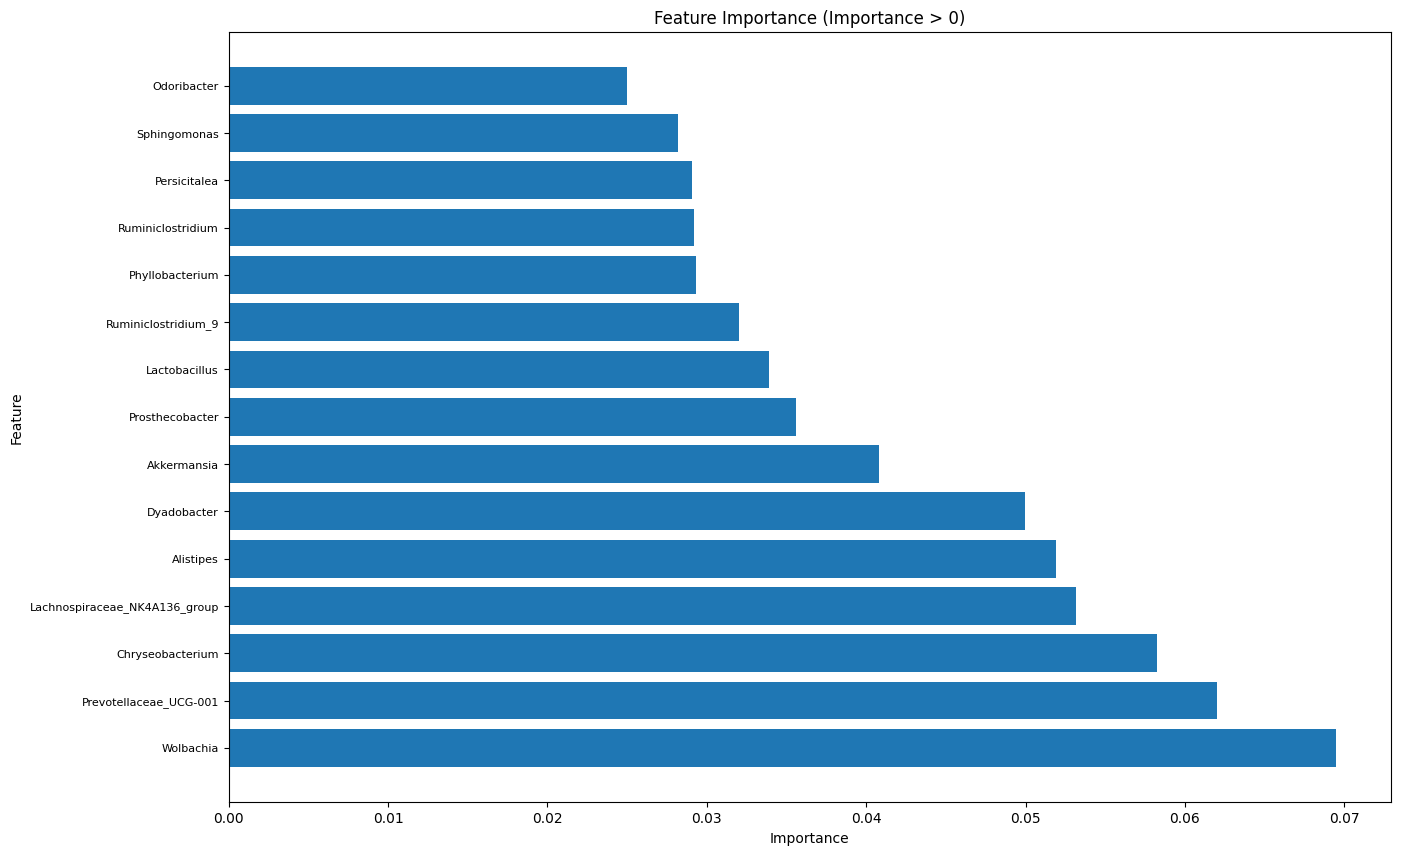

In [21]:
data = pd.read_csv('genus_table_Umar_MPD.csv')
metadata = pd.read_csv('P8_C_F.csv')

# Convert columns to numeric
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric)
# Low count filter
minimum_count = 4
prevalence_threshold = 0.2
# Filter features based on minimum count and prevalence threshold
filtered_data = data[data.iloc[:, 1:].ge(minimum_count).sum(axis=1) / data.shape[1] >= prevalence_threshold]
# Low variance filter
variance_cutoff = 0.1
# Filter features based on variance
data = filtered_data[filtered_data.iloc[:, 1:].var(axis=1) >= variance_cutoff]

# Select the numeric columns to normalize
numeric_columns = data.columns[1:]
scaler = MinMaxScaler()
# Normalize the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

otu_data_transposed = data.transpose()
new_column_names = otu_data_transposed.iloc[0]
otu_data_transposed = otu_data_transposed[1:]
otu_data_transposed.columns = new_column_names
# Reset the index and rename the index column
otu_data_transposed = otu_data_transposed.reset_index()
otu_data_transposed = otu_data_transposed.rename(columns={'index': '#NAME'})
otu_data_transposed['#NAME'] = otu_data_transposed['#NAME'].astype(str)
metadata['#NAME'] = metadata['#NAME'].astype(str)
merged_data = pd.merge(otu_data_transposed, metadata, on='#NAME')
new_columns = merged_data.columns.str.split(';').str[-1]
merged_data.columns = new_columns
merged_data = merged_data.drop(columns=['NA'])
# print(merged_data)
X = merged_data.drop('Experiment', axis=1)  # Replace 'target_variable' with the column name of your target variable
num_columns = X.shape[1]
print("Number of columns:", num_columns)
# print(X)
y = merged_data['Experiment']  # Replace 'target_variable' with the column name of your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=500,oob_score=True,random_state=42)
# Train the classifier on the training data
pre = rf.fit(X, y)

# Compute the OOB score (error rate)
oob_error_rate = 1 - rf.oob_score_
print(f"OOB error rate: {oob_error_rate:.2%}")
# # Make predictions on the test set
# predictions = rf.predict(X_test)

# # Print the predicted values
# print("Predicted values:", predictions)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# # Calculate confusion matrix
# cm = confusion_matrix(y_test, predictions)
# print("Confusion Matrix:")
# print(cm)

# from sklearn.metrics import classification_report

# # Calculate precision, recall, and f1-score
# report = classification_report(y_test, predictions)
# print("Classification Report:")
# print(report)

# Calculate the feature importances (mean decrease accuracy)
feature_importances = rf.feature_importances_
# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df = importance_df.loc[importance_df['Importance'] > 0]
importance_df = importance_df.head(15)
# print(importance_df)
# Plot a horizontal bar chart
plt.figure(figsize=(15, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Importance > 0)')
plt.yticks(fontsize=8)
# Show the plot
plt.show()



In [17]:
import pandas as pd

# Create a sample DataFrame
data = pd.DataFrame({
    'Feature': ['A', 'B', 'C', 'D', 'E'],
    'Sample1': ['1', '3', '2', '0', '4'],
    'Sample2': ['5', '7', '6', '4', '8'],
    'Sample3': ['9', '11', '10', '8', '12']
})

# Convert columns to numeric
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric)

# Low count filter
minimum_count = 4
prevalence_threshold = 0.2

# Filter features based on minimum count and prevalence threshold
filtered_data = data[data.iloc[:, 1:].ge(minimum_count).sum(axis=1) / data.shape[1] >= prevalence_threshold]

print("Filtered data after low count filter:")
print(filtered_data)

# Low variance filter
variance_cutoff = 0.1

# Filter features based on variance
data = filtered_data[filtered_data.iloc[:, 1:].var(axis=1) >= variance_cutoff]

# Find the minimum library size
min_library_size = data.iloc[:, 1:].apply(lambda x: x.count(), axis=0).min()

# Create a new DataFrame for rarefied data
rarefied_data = pd.DataFrame({'Feature': data['Feature']})

# Iterate over each sample column
for col in data.columns[1:]:
    # Get the non-null values for the current sample column
    non_null_values = data[col].dropna()
    
    # Randomly select a subset of observations equal to the minimum library size
    selected_values = np.random.choice(non_null_values, size=min_library_size, replace=False)
    
    # Add the selected observations to the rarefied data DataFrame
    rarefied_data[col] = selected_values

# Print the rarefied data
print(rarefied_data)




Filtered data after low count filter:
  Feature Sample1 Sample2 Sample3
0       A       1       5       9
1       B       3       7      11
2       C       2       6      10
3       D       0       4       8
4       E       4       8      12
  Feature  Sample1  Sample2  Sample3
0       A      NaN      NaN      NaN
1       B      NaN      NaN      NaN
2       C      NaN      NaN      NaN
3       D      NaN      NaN      NaN
4       E      NaN      NaN      NaN


In [ ]:

data = pd.read_csv('genus_table_Umar_MPD.csv')
metadata = pd.read_csv('P8_C_F.csv')
# data = data[(data != 0).sum(axis=1) >= data.shape[1] / 2]
label_mapping = dict(zip(metadata['#NAME'], metadata['Experiment']))
data_colunms = data.columns[1:]
new_columns = []
for column_name in data_colunms:
    str_column_name = int(column_name)
    if str_column_name in label_mapping:
        new_columns.append(label_mapping[str_column_name])
    else:
        new_columns.append(str_column_name)
data.columns = ['#NAME'] + new_columns
# Extract the feature names and mean decrease accuracy values
df = data.drop("#NAME", axis=1)  # Replace 'target_variable' with the column name of your target variable
split_df = pd.concat([data['#NAME'].str.split(';', expand=True)], axis=1)
split_df.columns = ['Column_1', 'Column_2', 'Column_3','Column_4', 'Column_5','Column_6']
columns_to_remove = ['Column_1', 'Column_2', 'Column_3','Column_4', 'Column_5']
data = pd.concat([split_df,df], axis=1)
data = data[data['Column_6'] != 'NA']
data = data.drop(columns=columns_to_remove)
data = data.T
new_columns = data.iloc[0]
data = data[1:]
data.columns = new_columns
data = data.reset_index().rename(columns={"index": "Experiment"})

# Separate the features (X) and the target variable (y)
X = data.drop('Experiment', axis=1)  # Replace 'target_variable' with the column name of your target variable
y = data['Experiment']  # Replace 'target_variable' with the column name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=7)
# Train the classifier on the training data
pre = rf.fit(X_train, y_train)
# # Make predictions on the test set
predictions = rf.predict(X_test)

# Print the predicted values
print("Predicted values:", predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

from sklearn.metrics import classification_report

# Calculate precision, recall, and f1-score
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Calculate the feature importances (mean decrease accuracy)
feature_importances = rf.feature_importances_
# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=True)
importance_df = importance_df.loc[importance_df['Importance'] > 0]
# Print the feature importances and label names
print("Feature Importances:")
for index, row in importance_df.iterrows():
    label = label_mapping.get(row['Feature'], row['Feature'])
    print(f"{label}: {row['Importance']}")
    


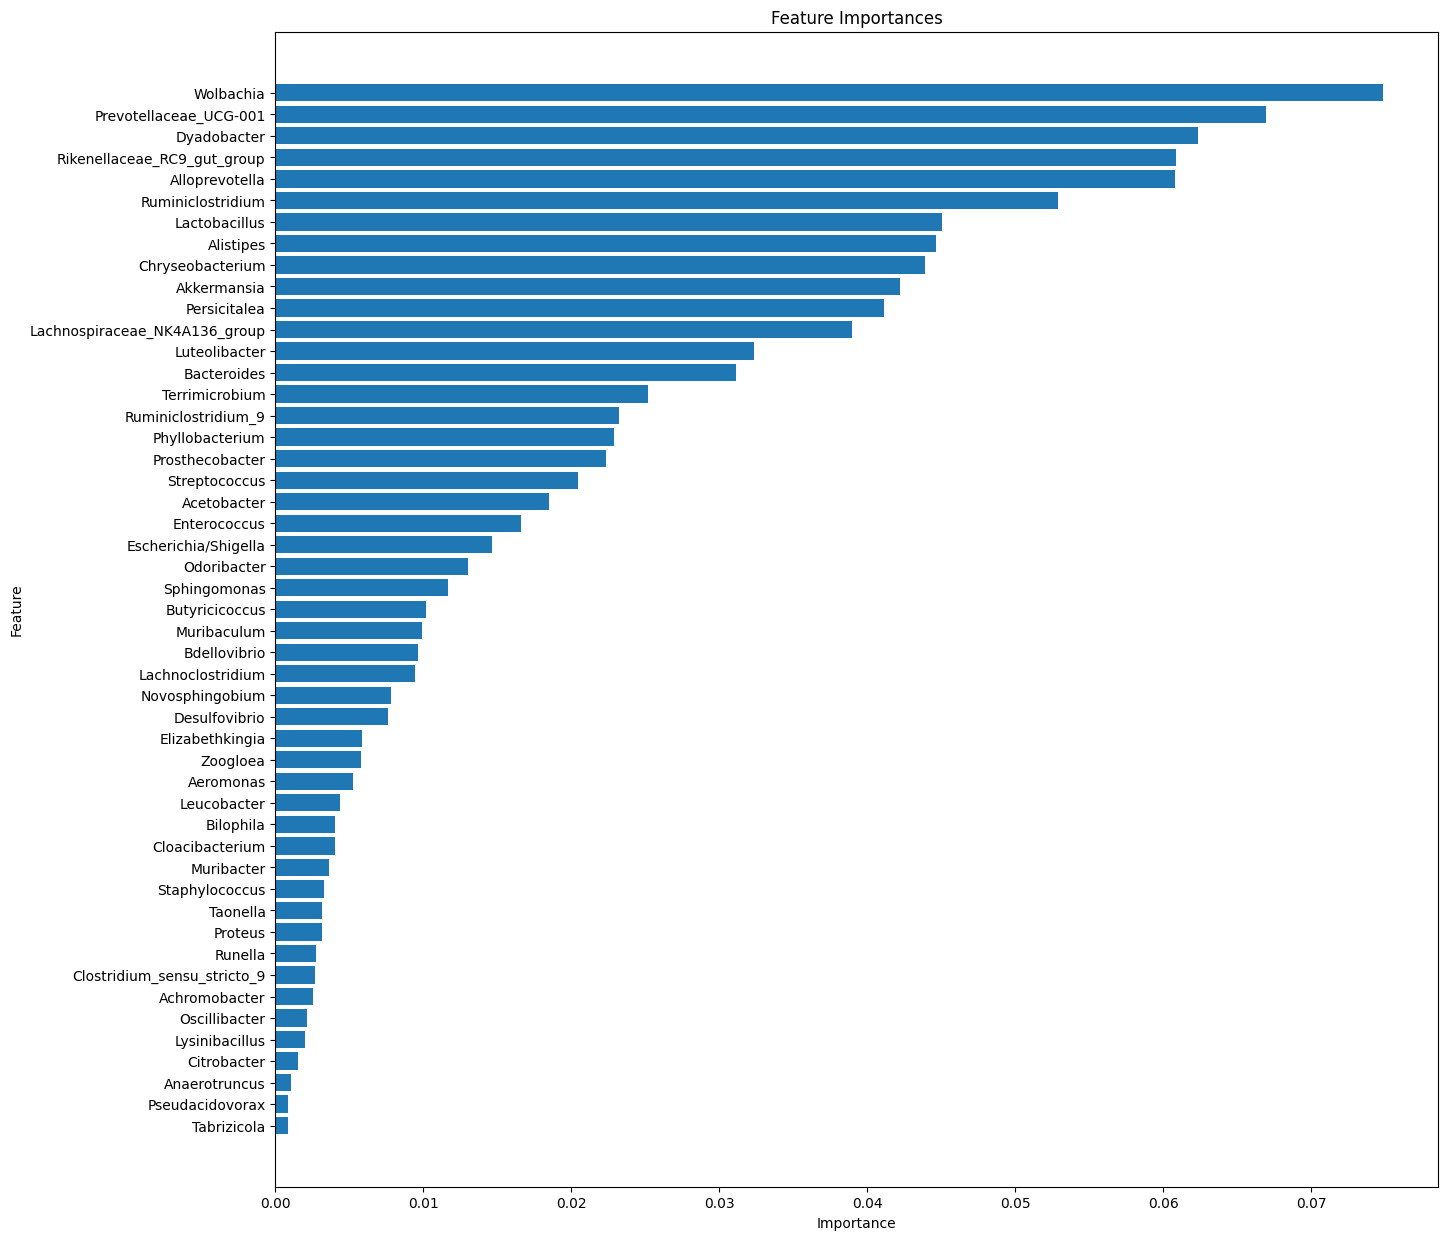

In [4]:
# Plot the feature importances
plt.figure(figsize=(15, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Show the plot
plt.show()


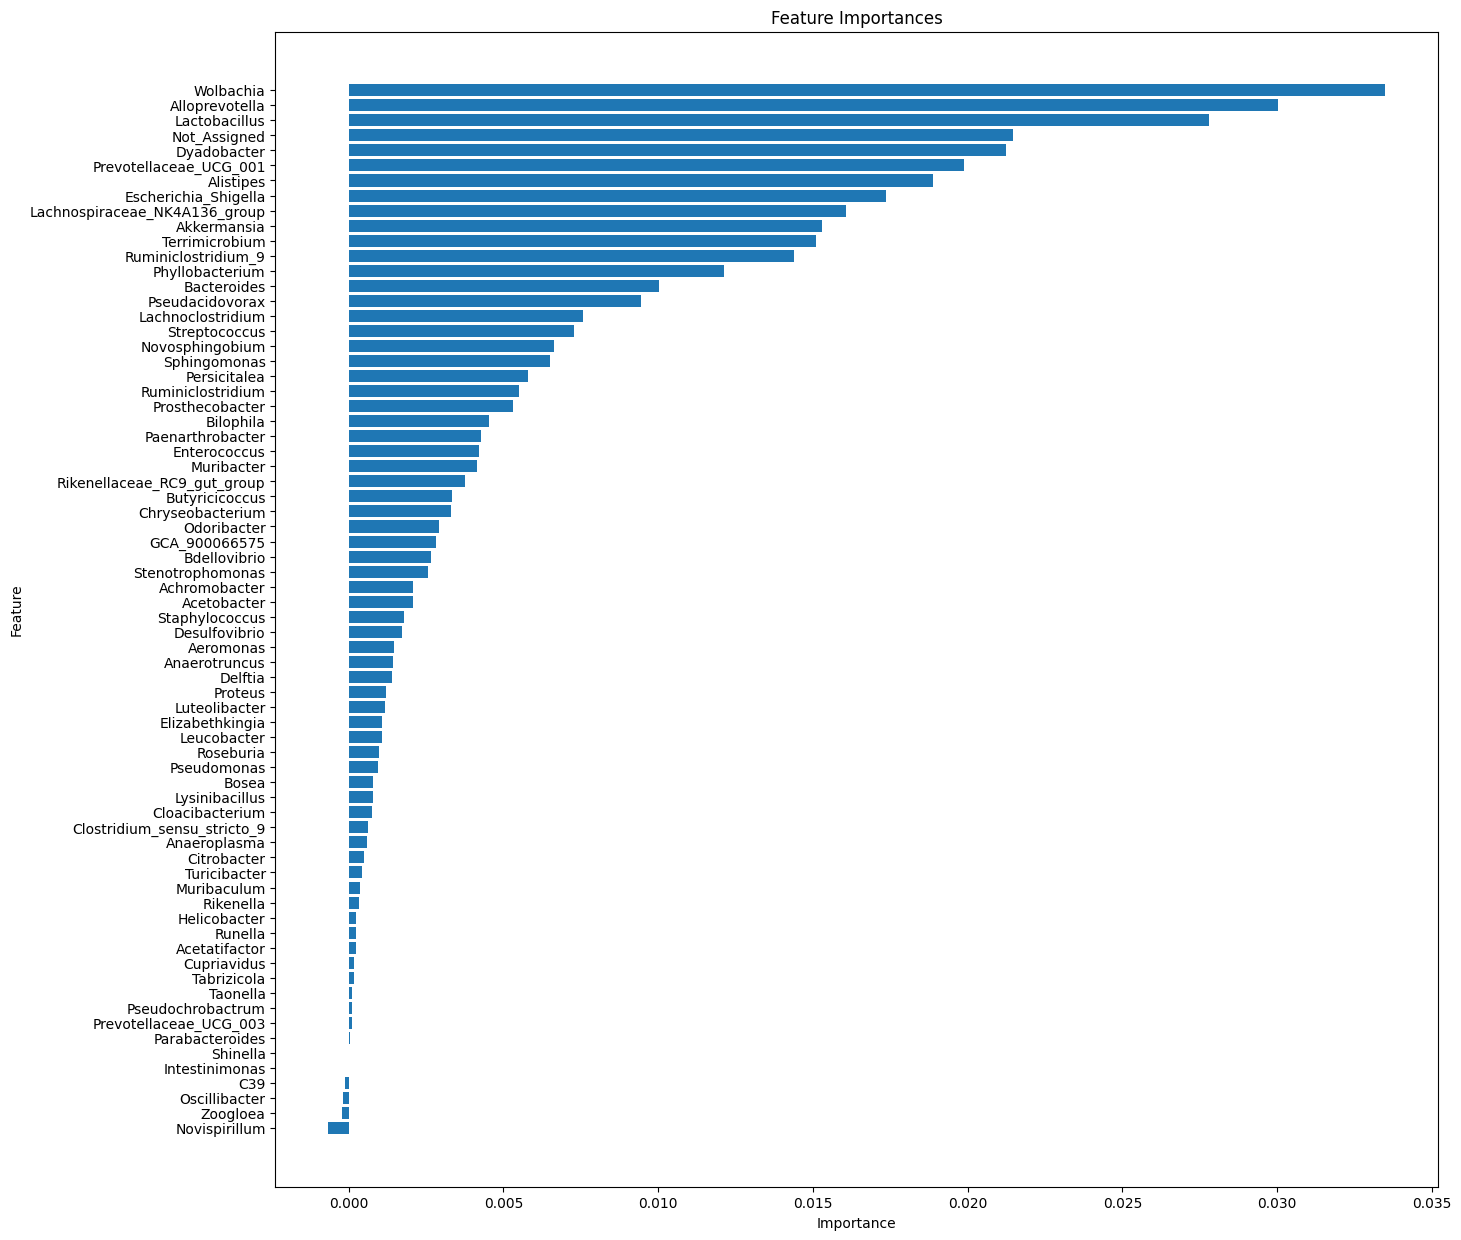

In [5]:
# Read the CSV file
data = pd.read_csv('randomforests_sigfeatures.csv')
# Plot a horizontal bar chart Names,MeanDecreaseAccuracy
data = data.sort_values('MeanDecreaseAccuracy', ascending=True)
# Plot a horizontal bar chart
plt.figure(figsize=(15, 15))
plt.barh(data['Names'], data['MeanDecreaseAccuracy'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Show the plot
plt.show()